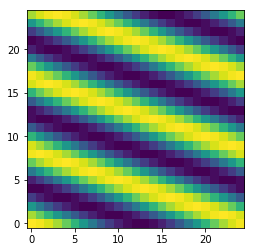

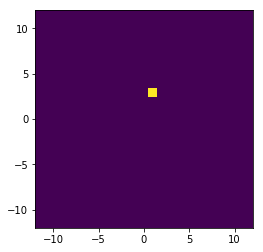

In [1]:
from scipy import fftpack
import numpy as np
import pylab as py

x,y = np.mgrid[:25,:25]

gx = 3.; gy = 1.

def gen_pw(gx,gy):
    # generate real space grid
    cx =  np.exp(2.*np.pi*1.j*(gx/25.)*x) # 
    cy =  np.exp(2.*np.pi*1.j*(gy/25.)*y) # 
    return cx*cy

r = gen_pw(gx,gy)

# Take the fourier transform of the image.
F1 = fftpack.fft2(r, axes=(0,1))

# Now shift so that low spatial frequencies are in the center.
F2 = fftpack.fftshift( F1 )

# the 2D power spectrum is:
psd2D = np.abs( F2 )**2

# plot the real part real space and  power spectrum in rec. space.
py.figure(1)
py.clf()
py.imshow( r.real , origin='lower')
py.figure(2)
py.imshow( psd2D, extent=[-12,12,-12,12], origin='lower')


py.show()




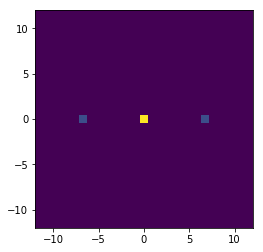

In [3]:

r = 1.*gen_pw(0,3)+1.2*gen_pw(0,-4)


# Take the fourier transform of the image.
r2 = np.abs(r)**2

F1 = fftpack.fft2(r2, axes=(0,1))

# Now shift so that low spatial frequencies are in the center.
F2 = fftpack.fftshift( F1 )

# the 2D power spectrum is:
psd2D = np.abs( F2 )**2

py.figure(3)
py.imshow( psd2D, extent=[-12,12,-12,12], origin='lower')
py.show()

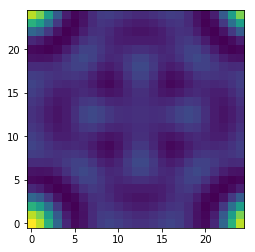

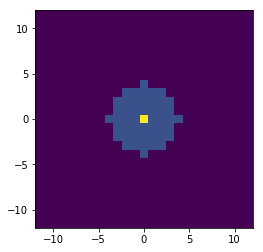

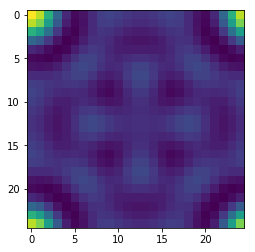

In [4]:
# reset
r = np.ones_like(x,dtype=np.complex)

# Ecut = 4
for i in range(-4,5,1):
    for j in range(-4,5,1):
        if (np.linalg.norm([i,j]) > 4.):
            continue
        r += gen_pw(i,j)

# Take the fourier transform.
F1 = fftpack.fft2(r, axes=(0,1))

# Now shift so that low spatial frequencies are in the center.
FS = fftpack.fftshift( F1 )

# the 2D power spectrum is:
psd2D = np.abs( FS )**2

# plot the real part real space and  power spectrum in rec. space.
py.figure(1)
py.imshow( r.real, origin='lower')
py.figure(2)
py.imshow( psd2D, extent=[-12,12,-12,12], origin='lower')
py.show()

# Take the fourier transform of the image.
r = fftpack.ifft2(F1, axes=(0,1))

# plot the inverse FFT
py.figure(3)
py.imshow(r.real)
py.show()

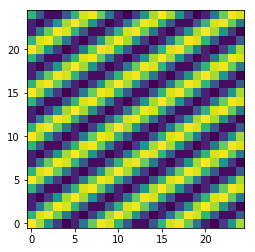

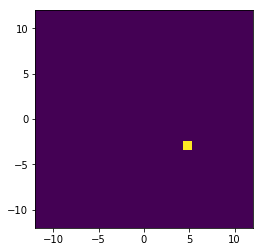

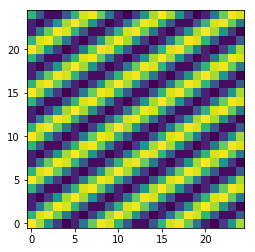

In [5]:
gx = 5.
gy = -3.

r = gen_pw(gx,gy)

# Take the fourier transform of the image with two 1D FFTs.
F1 = fftpack.fft(r,axis=0)

F2 = fftpack.fft(F1.T,axis=0)

# Now shift so that low spatial frequencies are in the center.
FS = fftpack.fftshift( F2 )

# the 2D power spectrum is:
psd2D = np.abs( FS )**2

# plot the real part or real space and the power spectrum in rec. space
py.figure(1)
py.imshow( r.real , origin='lower')
py.figure(2)
py.imshow( psd2D, extent=[-12,12,-12,12], origin='lower')

# Take the inverse fourier transform with two 1D ifft.
F1 = fftpack.ifft(F2,axis=0)

r = fftpack.ifft(F1.T,axis=0)

py.figure(3)
py.imshow( r.real , origin='lower')


py.show()

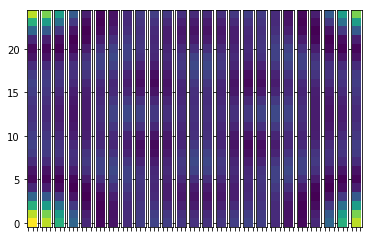

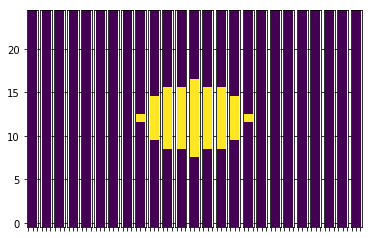

In [2]:
py.clf()
# real space grid
r = np.zeros_like(x,dtype=np.complex)

# define a set of pws (all with coefficient 1) up to q_cut 4
for i in range(-4,5,1):
    for j in range(-4,5,1):
        if (np.linalg.norm([i,j]) > 4.):
            continue
        r += gen_pw(i,j)

        
# split and plot the last index on 25 processes
py.figure(0);
f, axarr = py.subplots(1,25, sharey=True)
for i in range(25):
    axarr[i].imshow(r[:,i:(i+1)].real,vmin = np.min(r.real),vmax=np.max(r.real), origin='lower')
    axarr[i].set_xticklabels([])


F1 = np.zeros_like(r, dtype=np.complex)
F2 = np.zeros_like(r, dtype=np.complex)

# On each processor, do the FFT on the first axis 
for i in range(25):
    F1[:,i] = fftpack.fft(r[:,i])

# comunicate
F1 = np.transpose(F1)

# On each processor, do the FFT on the second axis
for i in range(25):
    F2[:,i] = fftpack.fft(F1[:,i])

# Now all processes have a portion of the transformed data
# in F2

# Shift so that low spatial frequencies are in the center.
FS = fftpack.fftshift( F2 )

# the 2D power spectrum is:
psd2D = np.abs( FS )**2

# plot the power spectrum of each processor
py.figure(1);
f, axarr = py.subplots(1,25, sharey=True)
for i in range(25):
    axarr[i].imshow(psd2D[:,i:(i+1)],vmin = np.min(psd2D),vmax=np.max(psd2D), origin='lower')
    axarr[i].set_xticklabels([])

py.show()

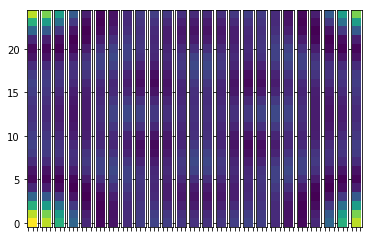

In [3]:
# re-initialize F1 and r, keep F2
F1 = np.zeros_like(F2, dtype=np.complex)
r = np.zeros_like(F2, dtype=np.complex)

# Now convert back
for i in range(25):
    if (i > 5 and i < 20):
        continue
    F1[:,i] = fftpack.ifft(F2[:,i])

# comunicate
F2 = np.transpose(F1)

# Convert the other index
for i in range(25):
    r[:,i] = fftpack.ifft(F2[:,i])


py.figure(2)
f, axarr = py.subplots(1,25, sharey=True)
for i in range(25):
    axarr[i].imshow(r[:,i:(i+1)].real,vmin = np.min(r.real),vmax=np.max(r.real), origin='lower')
    axarr[i].set_xticklabels([])


py.show()